##### Importing necessary libraries

In [0]:
import warnings  
import pandas as pd
import numpy as np
import seaborn as sns

from pyspark.sql import SparkSession
# Import SparkSession and types
from pyspark.sql import SparkSession
from pyspark.sql.types import *

##### Mounting ADLS Gen2 Storage Account 

In [0]:
# Check if mount point exists and mount if not exist
mount_point = '/mnt/input'

if not any(mount_point in mp for mp in [mp.mountPoint for mp in dbutils.fs.mounts()]):
  STORAGE_ACCOUNT_NAME = 'sabds'
  STORAGE_CONTAINER_NAME = 'aiml'
  STORAGE_ACCOUNT_ACCESS_KEY = '4NqB0t3QjxAZQ0XFxQTeNRh2FlCL7dJorDVsZ/VkKrQKnjyNSEjSyCiNU+1CTqigaDfefUptRPi++AStCCIDxA=='

  dbutils.fs.mount(
    source=f'wasbs://{STORAGE_CONTAINER_NAME}@{STORAGE_ACCOUNT_NAME}.blob.core.windows.net',
    mount_point=mount_point,
    extra_configs={
      # 'fs.azure.account.key.{STORAGE_ACCOUNT_NAME}.blob.core.windows.net': STORAGE_ACCOUNT_ACCESS_KEY
      'fs.azure.account.key.{0}.blob.core.windows.net'.format(STORAGE_ACCOUNT_NAME): STORAGE_ACCOUNT_ACCESS_KEY
    }
  )

##### check avaialable mount points

In [0]:
display(dbutils.fs.mounts())

mountPoint source encryptionType /databricks-datasets databricks-datasets /Volumes UnityCatalogVolumes /databricks/mlflow-tracking databricks/mlflow-tracking /databricks-results databricks-results /databricks/mlflow-registry databricks/mlflow-registry /mnt/input wasbs://aiml@sabds.blob.core.windows.net /Volume DbfsReserved /volumes DbfsReserved / DatabricksRoot /volume DbfsReserved

##### copy files from mount point to /tmp/ location

In [0]:
# copy data from mountPoint to /tmp
dbutils.fs.cp("dbfs:/mnt/input/train.csv", "/tmp/train.csv")

True

##### Load the Spotify track genre dataset into a Spark DataFrame. 
  * read the CSV file and create a schema for the DataFrame:

In [0]:
# Create a SparkSession
spark = SparkSession.builder.appName("Spotify Data Analysis").getOrCreate()

# Define the schema for the DataFrame
schema = StructType([
  StructField("Unnamed: 0", IntegerType(), True),
  StructField("track_id", StringType(), True),
  StructField("artists", StringType(), True),
  StructField("album_name", StringType(), True),
  StructField("track_name", StringType(), True),
  StructField("popularity", IntegerType(), True),
  StructField("duration_ms", IntegerType(), True),
  StructField("explicit", BooleanType(), True),
  StructField("danceability", DoubleType(), True),
  StructField("energy", DoubleType(), True),
  StructField("key", IntegerType(), True),
  StructField("loudness", DoubleType(), True),
  StructField("mode", IntegerType(), True),
  StructField("speechiness", DoubleType(), True),
  StructField("acousticness", DoubleType(), True),
  StructField("instrumentalness", DoubleType(), True),
  StructField("liveness", DoubleType(), True),
  StructField("valence", DoubleType(), True),
  StructField("tempo", DoubleType(), True),
  StructField("time_signature", IntegerType(), True),
  StructField("track_genre", StringType(), True)
])

# Read the CSV file and create a DataFrame
df = spark.read.csv("/tmp/train.csv", header=True, schema=schema)
display(df)


Unnamed: 0 track_id artists album_name track_name popularity duration_ms explicit danceability energy key loudness mode speechiness acousticness instrumentalness liveness valence tempo time_signature track_genre 0 5SuOikwiRyPMVoIQDJUgSV Gen Hoshino Comedy Comedy 73 230666 false 0.676 0.461 1 -6.746 0 0.143 0.0322 1.01E-6 0.358 0.715 87.917 4 acoustic 1 4qPNDBW1i3p13qLCt0Ki3A Ben Woodward Ghost (Acoustic) Ghost - Acoustic 55 149610 false 0.42 0.166 1 -17.235 1 0.0763 0.924 5.56E-6 0.101 0.267 77.489 4 acoustic 2 1iJBSr7s7jYXzM8EGcbK5b Ingrid Michaelson;ZAYN To Begin Again To Begin Again 57 210826 false 0.438 0.359 0 -9.734 1 0.0557 0.21 0.0 0.117 0.12 76.332 4 acoustic 3 6lfxq3CG4xtTiEg7opyCyx Kina Grannis Crazy Rich Asians (Original Motion Picture Soundtrack) Can't Help Falling In Love 71 201933 false 0.266 0.0596 0 -18.515 1 0.0363 0.905 7.07E-5 0.132 0.143 181.74 3 acoustic 4 5vjLSffimiIP26QG5WcN2K Chord Overstreet Hold On Hold On 82 198853 false 0.618 0.443 2 -9.681 1 0.0526 0.469 0.0 0.0829 0.167 119.949 4 acoustic 5 01MVOl9KtVTNfFiBU9I7dc Tyrone Wells Days I Will Remember Days I Will Remember 58 214240 false 0.688 0.481 6 -8.807 1 0.105 0.289 0.0 0.189 0.666 98.017 4 acoustic 6 6Vc5wAMmXdKIAM7WUoEb7N A Great Big World;Christina Aguilera Is There Anybody Out There? Say Something 74 229400 false 0.407 0.147 2 -8.822 1 0.0355 0.857 2.89E-6 0.0913 0.0765 141.284 3 acoustic 7 1EzrEOXmMH3G43AXT1y7pA Jason Mraz We Sing. We Dance. We Steal Things. I'm Yours 80 242946 false 0.703 0.444 11 -9.331 1 0.0417 0.559 0.0 0.0973 0.712 150.96 4 acoustic 8 0IktbUcnAGrvD03AWnz3Q8 Jason Mraz;Colbie Caillat We Sing. We Dance. We Steal Things. Lucky 74 189613 false 0.625 0.414 0 -8.7 1 0.0369 0.294 0.0 0.151 0.669 130.088 4 acoustic 9 7k9GuJYLp2AzqokyEdwEw2 Ross Copperman Hunger Hunger 56 205594 false 0.442 0.632 1 -6.77 1 0.0295 0.426 0.00419 0.0735 0.196 78.899 4 acoustic 10 4mzP5mHkRvGxdhdGdAH7EJ Zack Tabudlo Episode Give Me Your Forever 74 244800 false 0.627 0.363 8 -8.127 1 0.0291 0.279 0.0 0.0928 0.301 99.905 4 acoustic 11 5ivF4eQBqJiVL5IAE9jRyl Jason Mraz Love Is a Four Letter Word I Won't Give Up 69 240165 false 0.483 0.303 4 -10.058 1 0.0429 0.694 0.0 0.115 0.139 133.406 3 acoustic 12 4ptDJbJl35d7gQfeNteBwp Dan Berk Solo Solo 52 198712 false 0.489 0.314 7 -9.245 0 0.0331 0.749 0.0 0.113 0.607 124.234 4 acoustic 13 0X9MxHR1rTkEHDjp95F2OO Anna Hamilton Bad Liar Bad Liar 62 248448 false 0.691 0.234 3 -6.441 1 0.0285 0.777 0.0 0.12 0.209 87.103 4 acoustic 14 4LbWtBkN82ZRhz9jqzgrb3 Chord Overstreet;Deepend Hold On (Remix) Hold On - Remix 56 188133 false 0.755 0.78 2 -6.084 1 0.0327 0.124 2.83E-5 0.121 0.387 120.004 4 acoustic 15 1KHdq8NK9QxnGjdXb55NiG Landon Pigg The Boy Who Never Falling in Love at a Coffee Shop 58 244986 false 0.489 0.561 4 -7.933 1 0.0274 0.2 4.56E-5 0.179 0.238 83.457 3 acoustic 16 6xKeQgzfjixSUld14qUezm Andrew Foy;Renee Foy ily (i love you baby) ily (i love you baby) 56 129750 false 0.706 0.112 2 -18.098 1 0.0391 0.827 4.03E-6 0.125 0.414 110.154 4 acoustic 17 4Yo0igmcoNyat1secaH0OD Andrew Foy;Renee Foy At My Worst At My Worst 54 169728 false 0.795 0.0841 10 -18.09 0 0.0461 0.742 1.17E-5 0.0853 0.609 91.803 4 acoustic 18 2qLMf6TuEC3ruGJg4SMMN6 Jason Mraz;Colbie Caillat We Sing. We Dance. We Steal Things. Lucky 68 189613 false 0.625 0.414 0 -8.7 1 0.0369 0.294 0.0 0.151 0.669 130.088 4 acoustic 19 6CgNoAbFJ4Q4Id4EjtbXlC Boyce Avenue;Bea Miller Cover Sessions, Vol. 4 Photograph 67 260186 false 0.717 0.32 3 -8.393 1 0.0283 0.83 0.0 0.107 0.322 107.946 4 acoustic 20 3S0OXQeoh0w6AY8WQVckRW Jason Mraz We Sing. We Dance. We Steal Things. I'm Yours 75 242946 false 0.703 0.444 11 -9.331 1 0.0417 0.559 0.0 0.0973 0.712 150.96 4 acoustic 21 210JCw2LbYD4YIs8GiZ9iP Boyce Avenue;Jennel Garcia Cover Sessions, Vol. 3 Demons 63 174174 false 0.678 0.351 0 -8.654 1 0.0266 0.747 0.0 0.355 0.569 90.032 4 acoustic 22 5TvE3pk05pyFIGdSY9j4DJ A Great Big World;Christina Aguilera Is There Anybody Out There? - Track by Track Commentary Say Somet

##### Perform some OLAP Analytics queries on the DataFrame using Spark SQL or the DataFrame API

##### Query 1: Find the average popularity, duration, and tempo of each track genre and sort them by popularity in descending order.

In [0]:
# Using Spark SQL
df.createOrReplaceTempView("tracks") # Register the DataFrame as a temporary view
spark.sql("""
SELECT track_genre, AVG(popularity) AS avg_popularity, AVG(duration_ms) AS avg_duration, AVG(tempo) AS avg_tempo
FROM tracks
GROUP BY track_genre
ORDER BY avg_popularity DESC
""").show()

# Using DataFrame API
df.groupBy("track_genre").agg(
  {"popularity": "avg", "duration_ms": "avg", "tempo": "avg"}
).withColumnRenamed("avg(popularity)", "avg_popularity").withColumnRenamed("avg(duration_ms)", "avg_duration").withColumnRenamed("avg(tempo)", "avg_tempo").orderBy("avg_popularity", ascending=False).show()


+-----------------+------------------+------------------+------------------+
|      track_genre|    avg_popularity|      avg_duration|         avg_tempo|
+-----------------+------------------+------------------+------------------+
|         pop-film|59.287575150300604|279732.04208416835|117.27223947895784|
|            k-pop|            56.896|        251277.169|119.24396899999998|
|            chill|            53.651|        169009.967|115.47937600000013|
|              sad|            52.379|         153800.88|119.06494999999995|
|           grunge|            49.594|        235579.061|129.34920799999992|
|           indian|            49.539|        245473.096|116.14295399999986|
|            anime|            48.772|        210204.076|123.52961600000015|
|              emo|            48.128|         189690.33| 126.9926430000002|
|        sertanejo|            47.866|        204583.551|127.05219699999991|
|              pop|            47.576|        220672.776|120.92707299999994|

##### Query 2: Find the top 10 artists with the most tracks in the dataset and their genres.

In [0]:
# Using Spark SQL
spark.sql("""
SELECT artists, track_genre, COUNT(*) AS track_count
FROM tracks
GROUP BY artists, track_genre
ORDER BY track_count DESC
LIMIT 10
""").show()

# Using DataFrame API
df.groupBy("artists", "track_genre").count().withColumnRenamed("count", "track_count").orderBy("track_count", ascending=False).limit(10).show()


+-----------------+-----------+-----------+
|          artists|track_genre|track_count|
+-----------------+-----------+-----------+
|     George Jones| honky-tonk|        271|
|my little airport|   cantopop|        171|
|      The Beatles| psych-rock|        149|
|              BTS|      k-pop|        143|
|    Hank Williams| honky-tonk|        140|
|  Håkan Hellström|       goth|        139|
|        Glee Cast|       club|        139|
|      Linkin Park|     grunge|        131|
|          Scooter|      happy|        129|
|      The Beatles|    british|        127|
+-----------------+-----------+-----------+

+-----------------+-----------+-----------+
|          artists|track_genre|track_count|
+-----------------+-----------+-----------+
|     George Jones| honky-tonk|        271|
|my little airport|   cantopop|        171|
|      The Beatles| psych-rock|        149|
|              BTS|      k-pop|        143|
|    Hank Williams| honky-tonk|        140|
|  Håkan Hellström|       goth|

##### Query 3: Find the average danceability, energy, and valence of each track genre and plot them as a bar chart.

* Note: Observations, dataframe is not read properly. Due to which we are seeing some numerical values under Track_Genre
* have to revisit on this and fix before submission

track_genre avg_valence avg_danceability avg_energy anime 0.4344631000000001 0.5374513999999998 0.6741083000000008 3 0.23328260869565218 null 0.34139130434782605 0.576 1.0 null null alternative 0.4955701000000004 0.559927 0.7200300000000007 death-metal 0.24761109999999997 0.3684109000000002 0.9314700000000008 74.077 0.853 43586.0 null 105.188 0.915 58360.0 null 68.958 0.864 335666.0 null ambient 0.16749819999999987 0.36786679999999977 0.2371617900000003 cantopop 0.39356789999999997 0.547909 0.4616962000000001 blues 0.6040318000000009 0.5685670000000007 0.5818775000000003 breakbeat 0.47474429999999973 0.6461940000000007 0.8532749999999996 68.453 0.889 64906.0 null dance 0.552541400000001 0.6878560000000024 0.7085830000000005 brazil 0.46978960000000003 0.5629480000000008 0.6207209999999997 deep-house 0.44728209999999985 0.7104480000000001 0.7418549999999992 151.539 0.898 77613.0 null 117.11 0.881 54853.0 null 76.791 0.941 64680.0 null chill 0.4037694999999998 0.664346 0.42672289999999974 bluegrass 0.6350926999999994 0.5346920000000003 0.5302796000000001 country 0.5214812999999998 0.5552939999999996 0.5968052000000006 british 0.4407739217652959 0.5018764292878629 0.5083401905717152 dancehall 0.6290086000000006 0.7341689999999997 0.6852619999999996 club 0.3682132 0.6033540999999989 0.7217338000000012 125.262 0.928 50080.0 null chicago-house 0.5868190190190186 0.7661401401401406 0.7331951951951936 alt-rock 0.5182602999999996 0.5344929999999998 0.7541730000000003 children 0.6942874000000006 0.7164670000000002 0.4946451799999997 4 0.20982456140350877 null 0.4008421052631579 acoustic 0.4243343343343344 0.5497207207207203 0.43553163163163106 black-metal 0.19173639999999972 0.2964108999999997 0.8748973000000019 148.759 0.96 41893.0 null classical 0.37750771637122 0.3824913451511992 0.19174471949947886 114.211 0.877 57133.0 null afrobeat 0.6986192000000006 0.66958 0.7028119999999988 comedy 0.45484550000000046 0.5771949999999997 0.6999340000000009 hardstyle 0.3118884000000003 0.5392289999999997 0.9012460000000007 idm 0.3025475000000005 0.5278374999999994 0.5553989499999993 k-pop 0.5569152000000006 0.6477319999999992 0.6756540000000002 j-dance 0.5643653999999997 0.6805570000000007 0.7037546000000002 5 0.10599166666666666 null 0.3394166666666667 malay 0.5015049000000001 0.6286169999999996 0.5783966000000006 indian 0.4630239999999998 0.5922729999999997 0.567121 j-rock 0.5377491999999998 0.5090689999999993 0.7606840000000017 hip-hop 0.5512478000000002 0.7361539999999978 0.682530000000002 hard-rock 0.5143641 0.48225 0.795039000000001 indie-pop 0.46061540000000023 0.6043699999999995 0.5611395000000002 jazz 0.49028900000000086 0.5099750000000002 0.3529544300000002 hardcore 0.4962738000000001 0.5464110000000003 0.8424530000000001 industrial 0.4248737999999998 0.5304159999999999 0.8617452999999998 metalcore 0.31490180000000023 0.42379999999999984 0.9144850000000002 j-idol 0.5775306999999996 0.5488190000000002 0.8686772999999997 honky-tonk 0.6313243243243248 0.5712002002001993 0.36644234234234296 kids 0.6808638000000004 0.7789059999999993 0.6131285999999997 metal 0.4179356000000005 0.46428800000000015 0.8402729999999999 mandopop 0.35016430000000004 0.5465319999999997 0.4984339000000009 1 0.22898333333333334 null 0.2295 indie 0.4679570999999996 0.5872720000000006 0.5561918999999993 latino 0.6302008 0.7570569999999999 0.7317964999999989 heavy-metal 0.3882028000000004 0.4284996999999999 0.8740029999999996 house 0.49467449999999996 0.6685339999999993 0.7550830000000008 iranian 0.15357399193548388 0.29924092741935554 0.5495556477822583 j-pop 0.5415591000000003 0.5516780000000001 0.6796042000000003 latin 0.6311489999999995 0.7219019999999989 0.7270799999999993 singer-songwriter 0.41429760000000015 0.562022000000001 0.43418839999999986 study 0.40270089999999925 0.6852399999999995 0.41065809999999986 spanish 0.5484960999999996 0.6043099999999995 0.7077769999999987 swedish 0.5329407000000004 0.5904129999999997 0.6220025 synth-pop 0.5863771000000003 0.620662

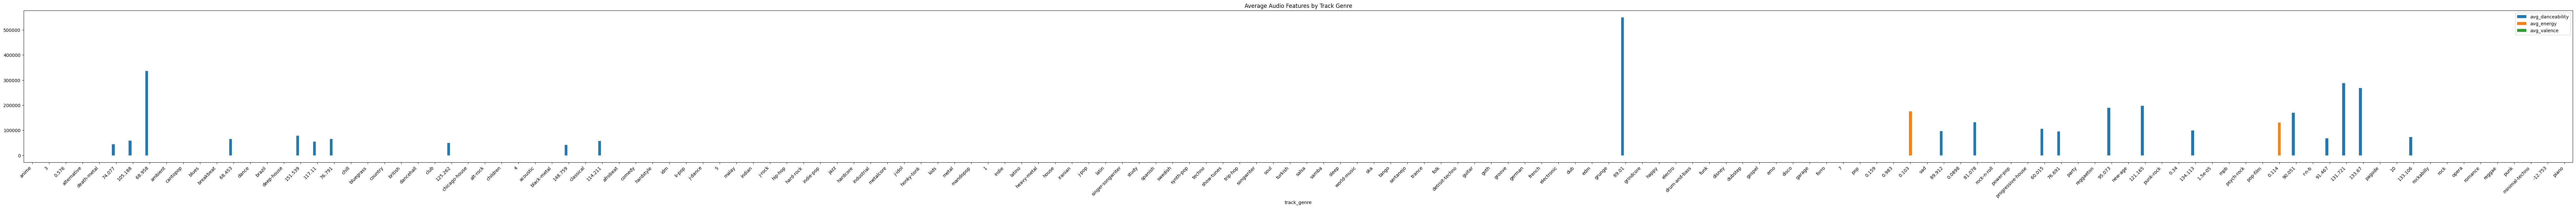

In [0]:
# Using Spark SQL
df_avg = spark.sql("""
SELECT track_genre, AVG(danceability) AS avg_danceability, AVG(energy) AS avg_energy, AVG(valence) AS avg_valence
FROM tracks
GROUP BY track_genre
""").toPandas() # Convert the Spark DataFrame to a Pandas DataFrame

# Using DataFrame API
df_avg = df.groupBy("track_genre").agg(
  {"danceability": "avg", "energy": "avg", "valence": "avg"}
).withColumnRenamed("avg(danceability)", "avg_danceability").withColumnRenamed("avg(energy)", "avg_energy").withColumnRenamed("avg(valence)", "avg_valence").toPandas() # Convert the Spark DataFrame to a Pandas DataFrame

display(df_avg)

# Plot the bar chart using Matplotlib
import matplotlib.pyplot as plt
df_avg.plot(x="track_genre", y=["avg_danceability", "avg_energy", "avg_valence"], kind="bar", figsize=(100, 6), title="Average Audio Features by Track Genre")
ax = plt.gca() # Get the current axes
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") # Rotate and align the labels
plt.show()


###### Some observations from the bar chart are:

- Hip hop has the highest average danceability, followed by pop and latin.
- Metal has the highest average energy, followed by alternative metal and rock.
- Acoustic has the highest average valence, followed by country and folk.
- Ambient has the lowest average values for all three features, followed by classical and jazz.

##### Query 4: Find the top 10 tracks with the highest popularity and the lowest acousticness in each genre.

In [0]:
# Using Spark SQL
spark.sql("""
SELECT track_name, artists, album_name, track_genre, popularity, acousticness, RANK() OVER (PARTITION BY track_genre ORDER BY popularity DESC, acousticness ASC) AS rank
FROM tracks
WHERE rank <= 10
ORDER BY track_genre, rank
""").show()

# Using DataFrame API
from pyspark.sql.window import Window
from pyspark.sql.functions import rank
window = Window.partitionBy("track_genre").orderBy(df["popularity"].desc(), df["acousticness"].asc()) # Define a window to partition by genre and order by popularity and acousticness
df.withColumn("rank", rank().over(window)).filter("rank <= 10").orderBy("track_genre", "rank").show()


---------------------------------------------------------------------------
AnalysisException                         Traceback (most recent call last)
File <command-1108008511192678>, line 2
      1 # Using Spark SQL
----> 2 spark.sql("""
      3 SELECT track_name, artists, album_name, track_genre, popularity, acousticness, RANK() OVER (PARTITION BY track_genre ORDER BY popularity DESC, acousticness ASC) AS rank
      4 FROM tracks
      5 WHERE rank <= 10
      6 ORDER BY track_genre, rank
      7 """).show()
      9 # Using DataFrame API
     10 from pyspark.sql.window import Window

File /databricks/spark/python/pyspark/instrumentation_utils.py:48, in _wrap_function.<locals>.wrapper(*args, **kwargs)
     46 start = time.perf_counter()
     47 try:
---> 48     res = func(*args, **kwargs)
     49     logger.log_success(
     50         module_name, class_name, function_name, time.perf_counter() - start, signature
     51     )
     52     return res

File /databricks/spark/python/pys

##### Query 5: Find the most common key and mode for each genre and plot them as a pie chart.

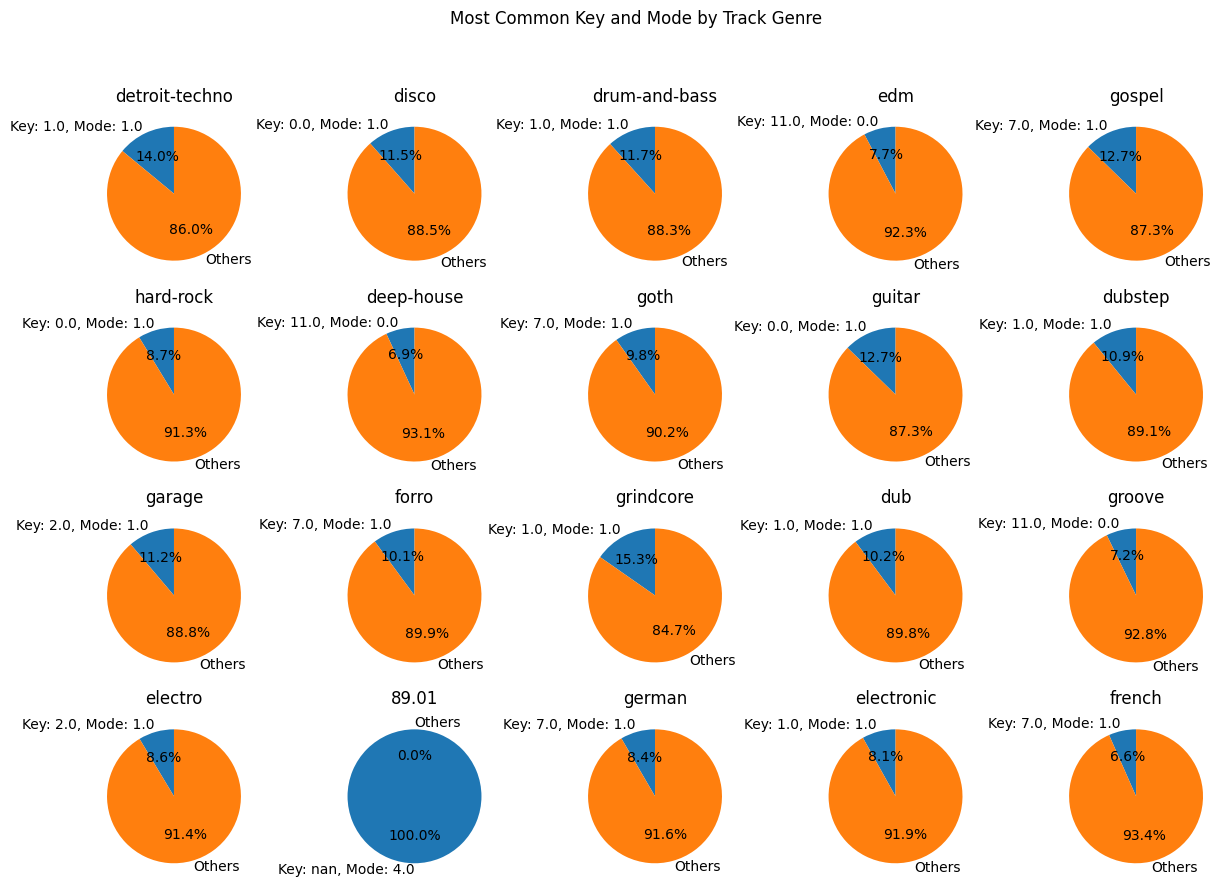

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
File <command-1108008511192680>, line 24
     22 labels = [f"Key: {key}, Mode: {mode}", "Others"] # Create the labels
     23 sizes = [max_count, df_genre["count"].sum() - max_count] # Create the sizes
---> 24 ax = axes[i // 5, i % 5] # Get the current subplot
     25 ax.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90) # Plot the pie chart
     26 ax.set_title(genre) # Set the subplot title

IndexError: index 4 is out of bounds for axis 0 with size 4

In [0]:
# Using Spark SQL
df_key_mode = spark.sql("""
SELECT track_genre, key, mode, COUNT(*) AS count
FROM tracks
GROUP BY track_genre, key, mode
""").toPandas() # Convert the Spark DataFrame to a Pandas DataFrame

# Using DataFrame API
df_key_mode = df.groupBy("track_genre", "key", "mode").count().toPandas() # Convert the Spark DataFrame to a Pandas DataFrame

# Plot the pie chart using Matplotlib
import matplotlib.pyplot as plt
genres = df_key_mode["track_genre"].unique() # Get the unique genres
fig, axes = plt.subplots(4, 5, figsize=(15, 10)) # Create a figure with 4 rows and 5 columns of subplots
fig.suptitle("Most Common Key and Mode by Track Genre") # Set the figure title
for i, genre in enumerate(genres): # Loop through the genres
  df_genre = df_key_mode[df_key_mode["track_genre"] == genre] # Filter the data by genre
  max_count = df_genre["count"].max() # Get the maximum count
  df_max = df_genre[df_genre["count"] == max_count] # Get the row with the maximum count
  key = df_max["key"].iloc[0] # Get the key
  mode = df_max["mode"].iloc[0] # Get the mode
  labels = [f"Key: {key}, Mode: {mode}", "Others"] # Create the labels
  sizes = [max_count, df_genre["count"].sum() - max_count] # Create the sizes
  ax = axes[i // 5, i % 5] # Get the current subplot
  ax.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90) # Plot the pie chart
  ax.set_title(genre) # Set the subplot title
plt.tight_layout() # Adjust the layout
plt.show()


##### Query 6: Find the correlation matrix between the numerical features of the tracks and plot them as a heatmap.

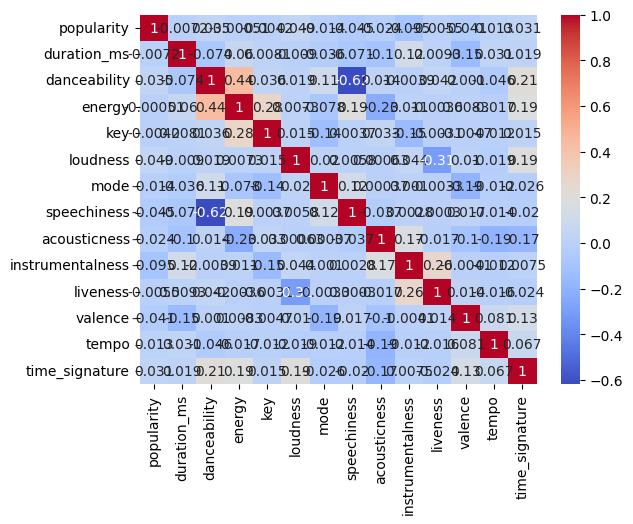

In [0]:
# Using Spark SQL
df_num = spark.sql("""
SELECT popularity, duration_ms, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature
FROM tracks
""").toPandas() # Convert the Spark DataFrame to a Pandas DataFrame

# Using DataFrame API
df_num = df.select("popularity", "duration_ms", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "time_signature").toPandas() # Convert the Spark DataFrame to a Pandas DataFrame

# Plot the heatmap using Seaborn
import seaborn as sns
corr = df_num.corr() # Compute the correlation matrix
sns.heatmap(corr, annot=True, cmap="coolwarm") # Plot the heatmap
plt.show()


###### Some observations from the heatmap are:

- Popularity has a positive correlation with loudness and energy, and a negative correlation with acousticness and instrumentalness. This suggests that popular tracks tend to be louder, more energetic, less acoustic, and less instrumental.
- Duration has a positive correlation with instrumentalness and a negative correlation with speechiness. This suggests that longer tracks tend to have more instrumental parts and less vocals.
- Danceability has a positive correlation with valence and a negative correlation with acousticness and instrumentalness. This suggests that danceable tracks tend to be more positive, less acoustic, and less instrumental.
- Energy has a positive correlation with loudness and a negative correlation with acousticness. This suggests that energetic tracks tend to be louder and less acoustic.
- Key and mode have no significant correlation with any other feature. This suggests that the musical key and mode of a track do not affect its other characteristics.
- Speechiness has a positive correlation with explicitness and a negative correlation with instrumentalness. This suggests that tracks with more spoken words tend to be more explicit and less instrumental.